# Enron  Analysis: 2000 Partition

## Data Preprocessing

In [1]:
import pandas as pd

# Importing data
main = pd.read_csv('../../data/processed_emails.csv',index_col=False)
main.replace(to_replace='NaN', value=None, inplace=True)
main.drop(['message', 'file'], axis = 1, inplace=True)

# Turning date strings int datetime objects
main['date'] = pd.to_datetime(main['date'])

main.head()

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/2735748863.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'])


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [2]:
data_00 = main[(main['date'] < pd.to_datetime('2001-01-01 00:00:00-07:00')) & 
                (main['date'] >= pd.to_datetime('2000-01-01 00:00:00-07:00'))]
data_00.head()

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00
5,"Greg, How about either next Tuesday or Thursda...",phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 04:17:00-07:00
6,Please cc the following distribution list with...,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-22 07:44:00-07:00


In [3]:
#Grouping by quarter

q1_2000 = data_00[data_00['date'] <= pd.to_datetime('2000-03-31 23:59:59-07:00')]
q2_2000 = data_00[(data_00['date'] <= pd.to_datetime('2000-06-30 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-04-01 00:00:00-07:00'))]
q3_2000 = data_00[(data_00['date'] < pd.to_datetime('2000-09-30 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-07-01 00:00:00-07:00'))]
q4_2000 = data_00[(data_00['date'] <= pd.to_datetime('2000-12-31 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-10-01 00:00:00-07:00'))]

quarterly_data = [q1_2000, q2_2000, q3_2000, q4_2000]


# Network Analysis | 2000

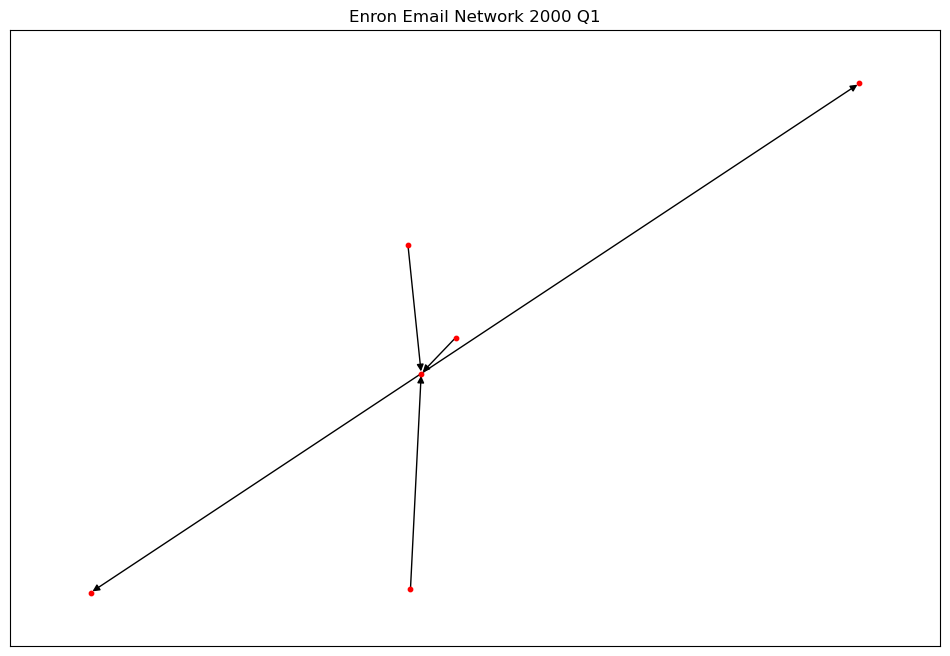

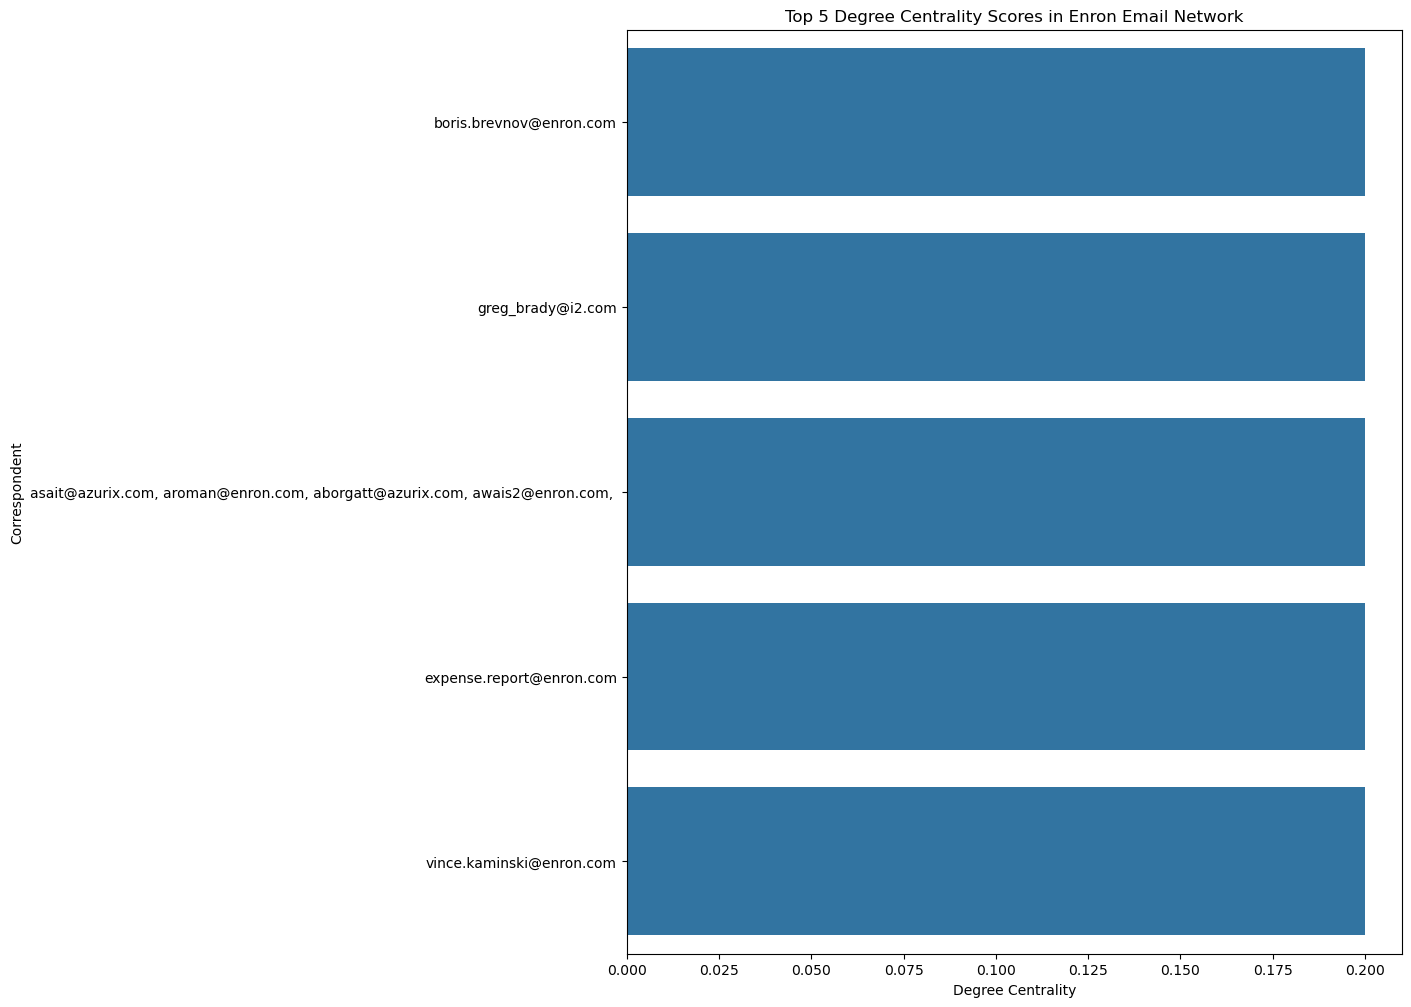



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['boris.brevnov@enron.com', 'greg_brady@i2.com', 'asait@azurix.com, aroman@enron.com, aborgatt@azurix.com, awais2@enron.com, ', 'expense.report@enron.com', 'vince.kaminski@enron.com']


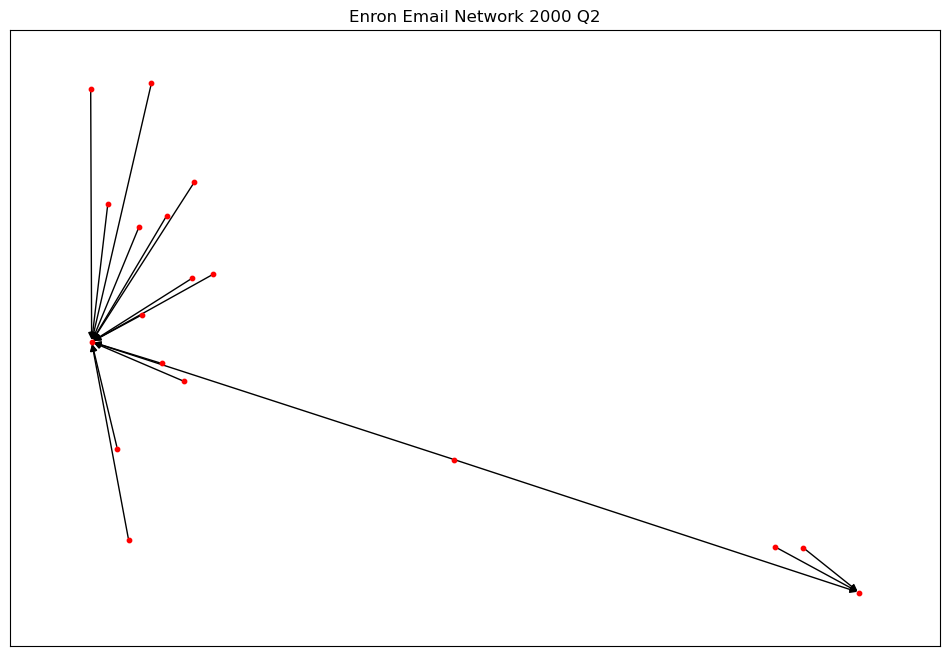

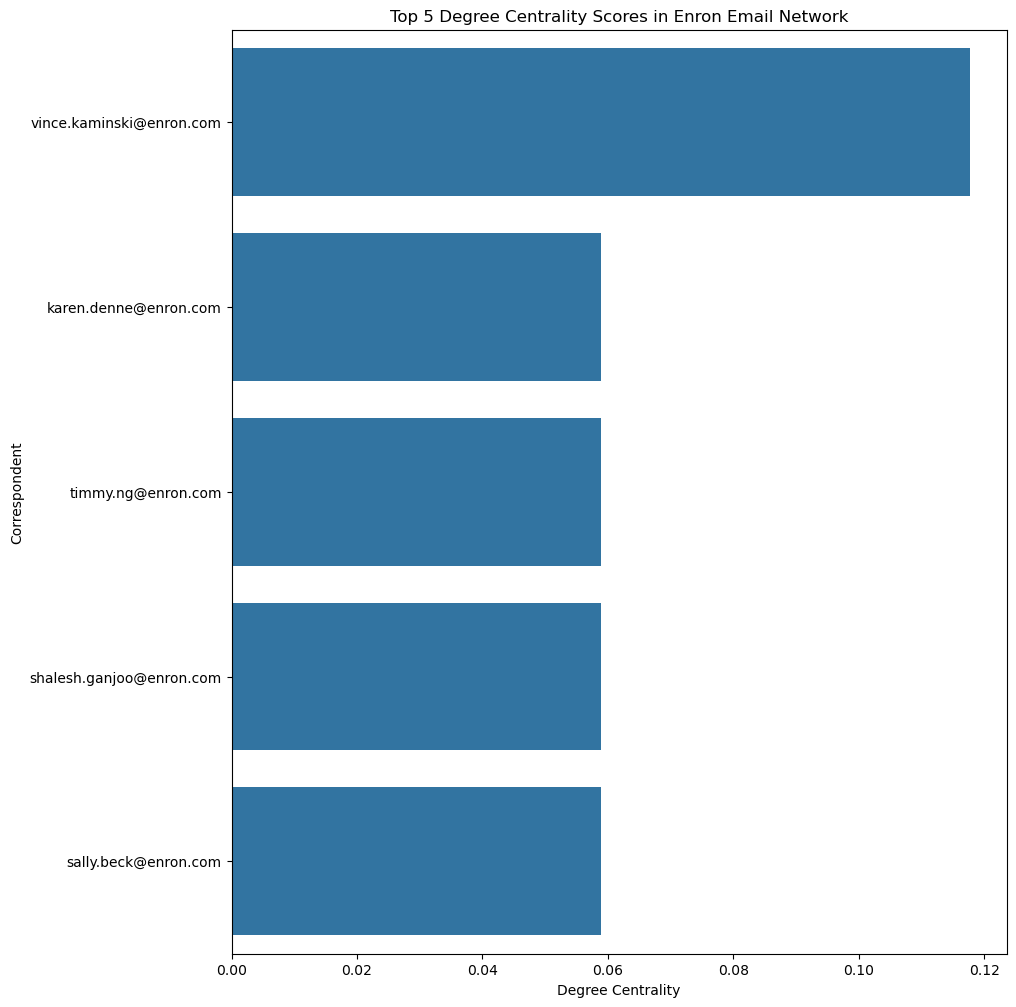



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['vince.kaminski@enron.com', 'karen.denne@enron.com', 'timmy.ng@enron.com', 'shalesh.ganjoo@enron.com', 'sally.beck@enron.com']


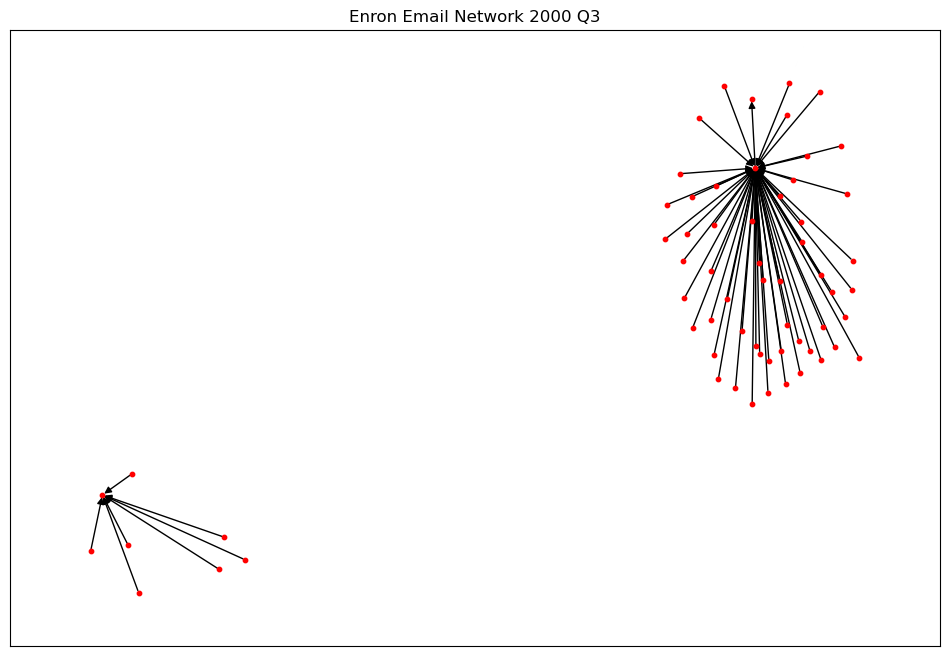

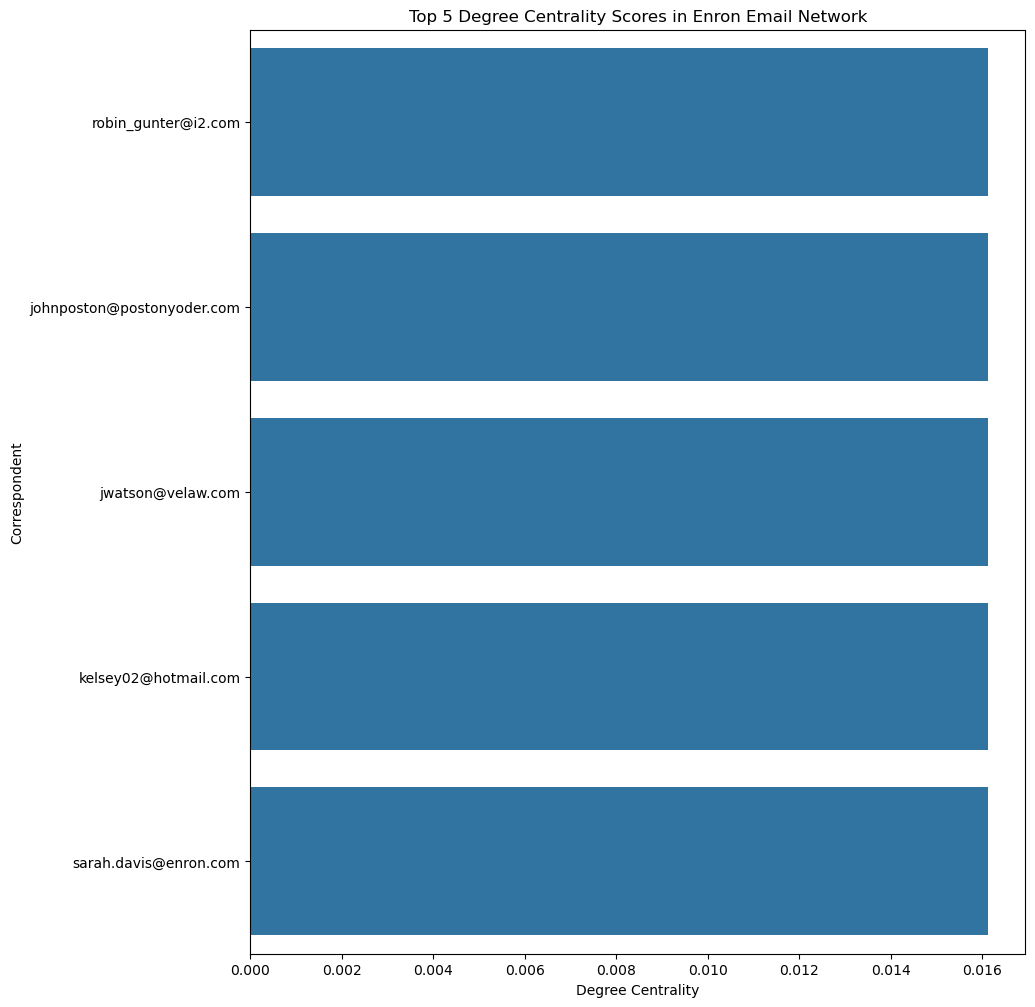



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['robin_gunter@i2.com', 'johnposton@postonyoder.com', 'jwatson@velaw.com', 'kelsey02@hotmail.com', 'sarah.davis@enron.com']


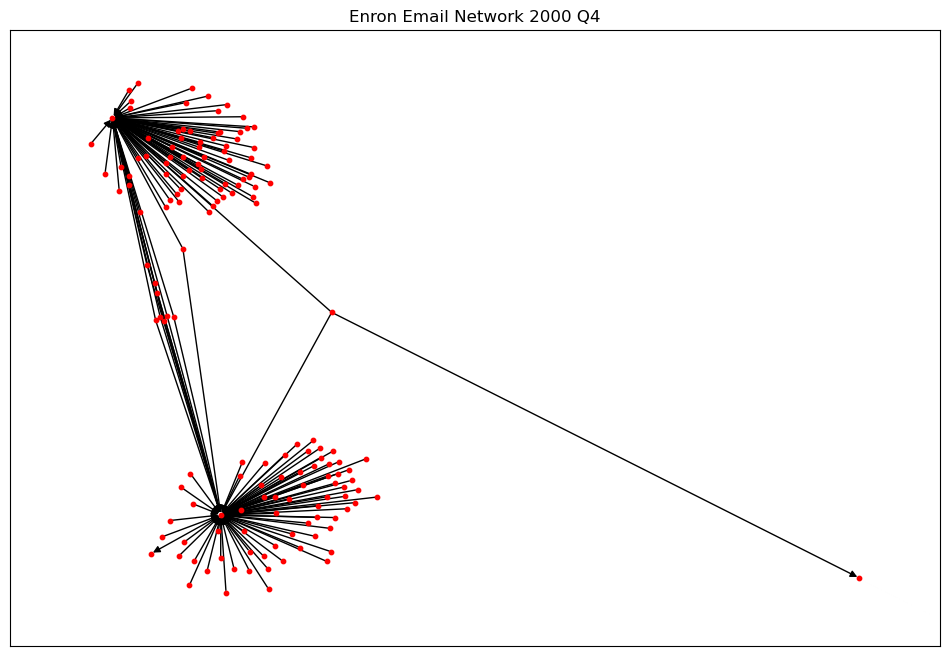

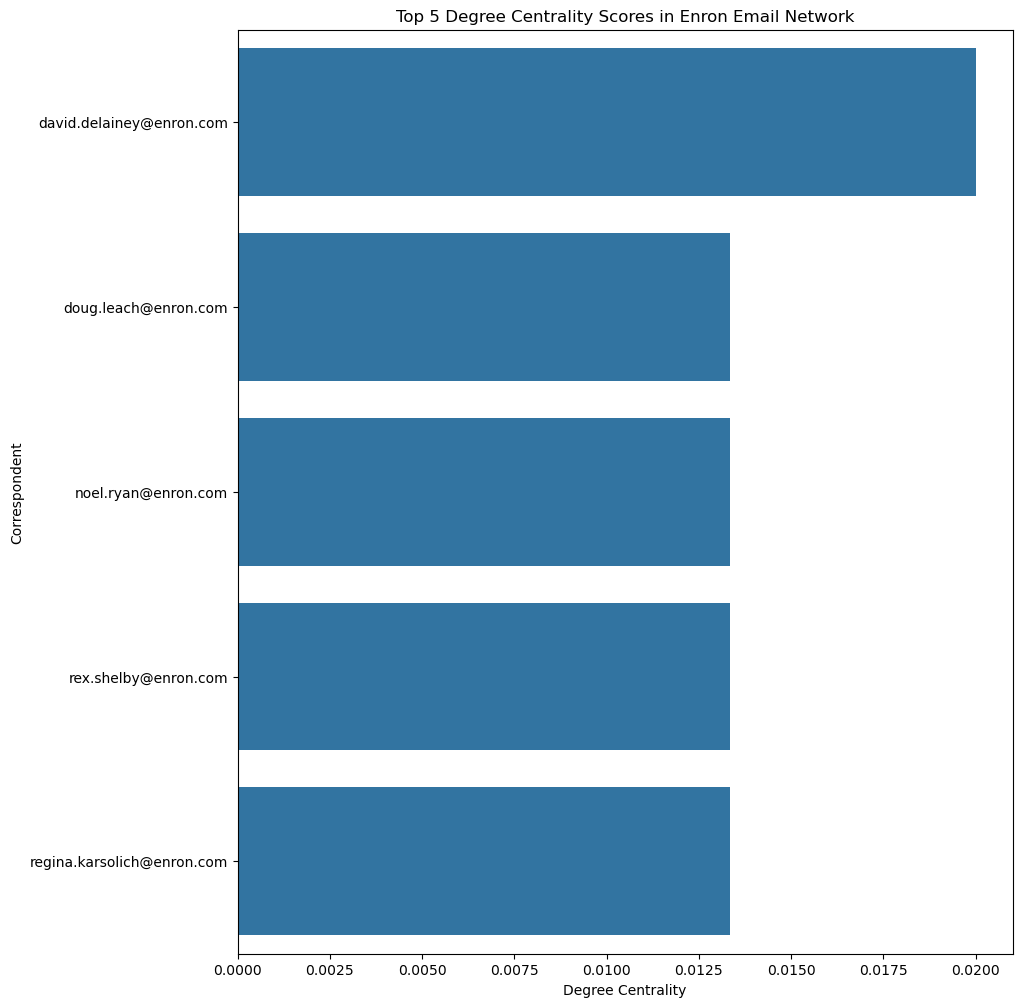



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['david.delainey@enron.com', 'doug.leach@enron.com', 'noel.ryan@enron.com', 'rex.shelby@enron.com', 'regina.karsolich@enron.com']


In [7]:
import network_funcs as nf

executives = nf.get_executives()
suspicious_individuals = []
for _, i in enumerate(quarterly_data):
    G = nf.create_network(i, f"Enron Email Network 2000 Q{_+1}")
    cent_df = nf.degree_centrality(G)
    cent_list = cent_df['name'].to_list()
    sus_folks = executives + cent_list[:5]
    print(f"\n\nExecutives: {executives}\n\nTop 5 Most-Involved in Emails: {cent_list[:5]}")
    suspicious_individuals.append(sus_folks)



# 1. Assesing Quarter 1 of 2000

## Sentiment Analysis

In [8]:
#For 2000


#Grouping by quarter
q1_2000 = data_00[data_00['date'] <= pd.to_datetime('2001-03-31 23:59:59-07:00')]

q1_2000['time'] = pd.to_datetime(q1_2000['date'], utc=True).dt.time

# Finding emails after hours
q1_2000_ah = q1_2000[(q1_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q1_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q1_2000_ah

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
104,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-10 15:02:00-07:00,22:02:00
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
695,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-08-10 15:02:00-07:00,22:02:00
813,Hi AllWe are looking for a wheat farmer near A...,bobregon@bga.com,strawbale@crest.org,NaN,NaN,Central Texas Bale Resource,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-03-14 17:07:00-08:00,01:07:00
...,...,...,...,...,...,...,...,...,...
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00
516359,X-From: Raj Mahajan <raj.mahajan@kiodex.com>X-...,raj.mahajan@kiodex.com,"lydia.cannon@enron.com, jay.webb@enron.com, dr...",Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,"\traj.mahajan@kiodex.com, jay@enron.com","Bcc: andy.zipper@enron.com, mary.weatherstone@...",2000-12-13 18:01:00-08:00,02:01:00
516844,Content-Type: text/plain; charset=us-asciiCont...,davidpsmith@att.net,jamills@storm.ca,"\tjoanna.silver@redklay.com, syscokid@bellsout...","\tseansh@attachmate.com, darcy@dialin.net, dsh...",new email address,"\tjrosen@cadiesel.com, bmraynor@mq.psd.k12.ca....",2000-09-09 15:01:00-07:00,22:01:00


In [9]:
sus_df_q1 = q1_2000_ah[(q1_2000_ah['sender'].isin(suspicious_individuals[0])) | (q1_2000_ah['recipient1'].isin(suspicious_individuals[0]))]
sus_df_q1

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
21812,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
26507,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
31197,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
88788,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00,20:34:00
...,...,...,...,...,...,...,...,...,...
495837,X-Origin: Watson-KX-FileName: KWATSON (Non-Pri...,vince.kaminski@enron.com,kimberly.watson@enron.com,X-From: Vince J Kaminski <Vince J Kaminski/HOU...,X-To: Kimberly Watson <Kimberly Watson/ET&S/En...,Accounting adjustment,X-cc: Vince J Kaminski <Vince J Kaminski/HOU/E...,2000-08-28 16:45:00-07:00,23:45:00
500355,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00
501508,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00
502419,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00


In [10]:
sus_df_q1.drop_duplicates(inplace=True)
sus_df_q1

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/2089915391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q1.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
88788,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00,20:34:00
115273,OK. DF---------------------- Forwarded by Dre...,drew.fossum@enron.com,expense.report@enron.com,NaN,NaN,Susan's expense report 11/16/00,\Drew_Fossum_Dec2000_June2001_1\Notes Folders\...,2000-11-19 11:20:00-08:00,19:20:00
116986,OK. DF---------------------- Forwarded by Dre...,drew.fossum@enron.com,expense.report@enron.com,NaN,NaN,Susan's expense report 11/16/00,\Drew_Fossum_Dec2000_June2001_1\Notes Folders\...,2000-11-19 11:20:00-08:00,19:20:00
117853,OK. DF---------------------- Forwarded by Dre...,drew.fossum@enron.com,expense.report@enron.com,NaN,NaN,Susan's expense report 11/16/00,\Drew_Fossum_Dec2000_June2001_1\Notes Folders\...,2000-11-19 11:20:00-08:00,19:20:00
...,...,...,...,...,...,...,...,...,...
445899,"> Dear Jeff,>> Although I don't think we've me...",lrivera@endesa.es,jeff.skilling@enron.com,NaN,NaN,contact,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-03 12:58:00-08:00,20:58:00
445912,It's my pleasure to attend -- I am looking for...,daronoff@greylock.com,jeff.skilling@enron.com,NaN,NaN,"RE: YPO Panel, April 24, 2001",\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-11-28 11:47:00-08:00,19:47:00
446101,Thanks for your support in the board meeting t...,richard.lammers@enron.com,jeff.skilling@enron.com,NaN,NaN,Re: Background info on Cuiaba board pitch today,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-11 13:06:00-08:00,21:06:00
495837,X-Origin: Watson-KX-FileName: KWATSON (Non-Pri...,vince.kaminski@enron.com,kimberly.watson@enron.com,X-From: Vince J Kaminski <Vince J Kaminski/HOU...,X-To: Kimberly Watson <Kimberly Watson/ET&S/En...,Accounting adjustment,X-cc: Vince J Kaminski <Vince J Kaminski/HOU/E...,2000-08-28 16:45:00-07:00,23:45:00


In [13]:
import sentiment_funcs as sf

# Parititioning data into groups of 1000
chunks_00s = sf.chunk_dataframe(sus_df_q1, chunk_size=100)

/opt/anaconda3/envs/enron/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
#Sentiment classification
data_q1 = sf.label_df(chunks_00s)
data_q1


Processing Chunk 1/4


Processing Chunk 2/4


Processing Chunk 3/4


Processing Chunk 4/4



,text,embeddings,label
0,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,"[-0.034200675785541534, -0.08523061126470566, ...",positive
1,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,"[-0.12082846462726593, 0.022826943546533585, 0...",neutral
2,OK. DF---------------------- Forwarded by Dre...,"[-0.045454349368810654, 0.02930505946278572, -...",neutral
3,OK. DF---------------------- Forwarded by Dre...,"[-0.045454349368810654, 0.02930505946278572, -...",neutral
4,OK. DF---------------------- Forwarded by Dre...,"[-0.045454349368810654, 0.02930505946278572, -...",neutral
...,...,...,...
307,"> Dear Jeff,>> Although I don't think we've me...","[-0.06200849637389183, -0.03118758834898472, 0...",neutral
308,It's my pleasure to attend -- I am looking for...,"[-0.07384909689426422, -0.02109639160335064, 0...",positive
309,Thanks for your support in the board meeting t...,"[-0.06299140304327011, -0.009978252463042736, ...",positive
310,X-Origin: Watson-KX-FileName: KWATSON (Non-Pri...,"[-0.0733126625418663, 0.016240036115050316, 0....",neutral


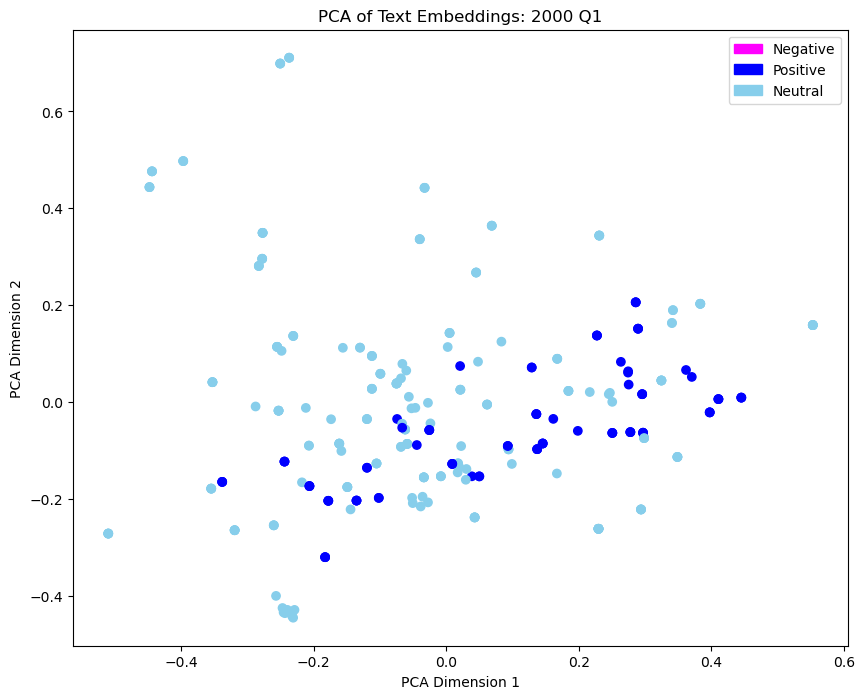

In [15]:

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



def PCA_plot(data: pd.DataFrame, title: str):
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(data['embeddings'].tolist())


    labels = data['label'].tolist()
    colors = ['magenta' if label == 'negative' else 'blue' if label == 'positive' else '#87CEEB' for label in labels]

    #Create Scatter Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)


    negative_patch = mpatches.Patch(color='magenta', label='Negative')
    positive_patch = mpatches.Patch(color='blue', label='Positive')
    neutral_patch = mpatches.Patch(color='#87CEEB', label='Neutral')

    plt.legend(handles=[negative_patch, positive_patch, neutral_patch])
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.title(f'PCA of Text Embeddings: {title}')
    plt.show()


PCA_plot(data_q1, '2000 Q1')

## Printing  Messages

In [16]:
negative_msgs = data_q1[data_q1['label'] == 'negative']
neutral_msgs = data_q1[data_q1['label'] == 'neutral']
positive_msgs = data_q1[data_q1['label'] == 'positive']

def print_emails (df):
    for _, row in df.iterrows():
        print(f"\n{_}: {row['text']}\n")

In [17]:
# Negative Emails
print_emails(negative_msgs)

# Suspicious Emails: 327 (Look into Benjamin Thomason), 298 (Who is Griffin?)


In [18]:
#Neutral Emails
print_emails(neutral_msgs)


1: X-Origin: Delainey-DX-FileName: ddelain.nsfKen, in response to your note, I am not aware of any official dialogue with Mr. Kase Lawal about a potential sale of Mariner or with the economics of the aborted IPO.  His $250 M valuation may have been appropriate 12 to 18 months ago.  However, Mariner has enjoyed a series of successful wells that are expected to be booked in reserve reports next March not to mention significant increases in gas and oil prices.  Our current valuations, in the $600M range is a stretch target but not incredibly out of line given reserve growth and current energy prices.  Our current goal, is to be able to demonstrate three to four quarters of increasing operating cashflow and reserves growth before attempting a private sale mid next year to a significant E&P concern that desires an offshore division.  The concentration, operating and exploration risk implicit in Mariner make it a very poor IPO candidate ((ie) I'm not sure that an IPO was ever a viable strat

In [ ]:
print_emails(positive_msgs)

#Sus: 651, 655


0: X-Origin: Beck-SX-FileName: sbeck.nsfThanks in advance for agreeing to speak at the Global Operations Controller Forum that I am hosting next week.  There will be approximately 30 Enron business controllers present at the meeting.  All have responsibility for mid and back office operations for the following Enron entities:  Enron North America, Enron Europe, Enron South America, Enron Global Markets, Enron Industrial Markets, Enron Broadband Services and Enron Energy Services.  Attendees will be here from Houston, Calgary, Tokyo, Sydney, London and New York (metals business).   Attached for your reference is the agenda. There may be some slight changes before the forum begins, but this will give you a good idea of the topics to be covered and the other speakers who will address the group.  You are scheduled to address the group as follows:Date:  Tuesday, October 24, 2000Time:  8:30 am  (breakfast will be served at 8:00 and you are invited to join us)Place:  The Warwick Hotel  The V

# 2. Assesing Quarter 2 of 2000

In [19]:
q2_2000['time'] = pd.to_datetime(q2_2000['date'], utc=True).dt.time
q2_2000_ah = q2_2000[(q2_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q2_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q2_2000_ah

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/2426238261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_2000['time'] = pd.to_datetime(q2_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
8621,"Sue, Could you please send me your cell phone ...",robert.badeer@enron.com,susan.mara@enron.com,NaN,NaN,cell phone number,\Robert_Badeer_Aug2000\Notes Folders\'sent mail,2000-06-27 13:21:00-07:00,20:21:00
8792,"Sue, Could you please send me your cell phone ...",robert.badeer@enron.com,susan.mara@enron.com,NaN,NaN,cell phone number,\Robert_Badeer_Aug2000\Notes Folders\All docum...,2000-06-27 13:21:00-07:00,20:21:00
8817,X-bcc: X-Folder: \Robert_Badeer_Aug2000\Notes ...,mona.petrochko@enron.com,"phyllis.anzalone@enron.com, douglas.condon@enr...",Content-Transfer-Encoding: 7bit,"Bcc: sf.ga@enron.com, paul.kaufman@enron.com, ...","\tdavid.forster@enron.com, john.neslage@enron....",X-From: Mona L Petrochko,2000-06-16 12:08:00-07:00,19:08:00
8843,"miltr@houxchange.ckor.com, njarmstrong@avondal...",casey@mercatorpartners.com,"bromberg@cgalaska.uscg.mil, balgeo@rpw200.com,...","\tjddow@shore.net, jpiche@kpmg.com, jandrews@r...","\tj.vorbach@worldnet.att.net, jcoburn@whoi.edu,","\trobert.badeer@enron.com, bfogel@hbs.edu, cco...","\tjsanto@mba.2001.hbs.edu, jrwhitehead@msobost...",2000-06-07 16:17:00-07:00,23:17:00
8851,"This morning, we announced an offer to acquire...",office.chairman@enron.com,all.worldwide@enron.com,NaN,NaN,"=?ANSI_X3.4-1968?Q?Enron=01,s_Entry_Into_Globa...",\Robert_Badeer_Aug2000\Notes Folders\All docum...,2000-05-21 18:55:00-07:00,01:55:00
...,...,...,...,...,...,...,...,...,...
501509,"Jim,Greg received a faxed copy of a slide on E...",liz.taylor@enron.com,jim.fallon@enron.com,NaN,NaN,Physical Power Volumes - 1st Q99 vs 1st Q00,\Lawrence_Whalley_Dec2000\Notes Folders\All do...,2000-04-03 12:33:00-07:00,19:33:00
502418,"Jim,Greg received a faxed copy of a slide on E...",liz.taylor@enron.com,jim.fallon@enron.com,NaN,NaN,Physical Power Volumes - 1st Q99 vs 1st Q00,\Lawrence_Whalley_Dec2000\Notes Folders\Discus...,2000-04-03 12:33:00-07:00,19:33:00
502419,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00
503475,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00


In [20]:
sus_df_q2 = q2_2000_ah[(q2_2000_ah['sender'].isin(suspicious_individuals[1])) | (q2_2000_ah['recipient1'].isin(suspicious_individuals[1]))]
sus_df_q2.drop_duplicates(inplace=True)
sus_df_q2

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/3567306008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q2.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20930,Attached are my accomplishments for the first ...,sally.beck@enron.com,richard.causey@enron.com,NaN,NaN,Accomplishments,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-30 13:03:00-07:00,20:03:00
20931,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-30 12:59:00-07:00,19:59:00
20938,Attached is Bob Superty's summary of the impac...,sally.beck@enron.com,"david.delainey@enron.com, john.lavorato@enron.com",NaN,NaN,System outage nomination impact,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-28 12:07:00-07:00,19:07:00
20993,Per my voice mail...somehow my intent to copy ...,sally.beck@enron.com,wanda.curry@enron.com,NaN,NaN,Re: Enron Trading,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-05-25 12:37:00-07:00,19:37:00
21030,I heard this morning from Susan Harrison that ...,sally.beck@enron.com,cindy.olson@enron.com,NaN,NaN,Re: RICE UNIVERSITY: MBA for EXECUTIVES,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-05-08 12:26:00-07:00,19:26:00
...,...,...,...,...,...,...,...,...,...
247496,X-Folder: \Steven_Kean_June2001_4\Notes Folder...,karen.denne@enron.com,"mark.koenig@enron.com, paula.rieker@enron.com,...","Bcc: mark.palmer@enron.com, john.ambler@enron.com",X-From: Karen Denne,\tsteven.kean@enron.com,"X-To: Mark Koenig, Paula Rieker, Rex Rogers, S...",2000-06-07 14:36:00-07:00,21:36:00
249292,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,karen.denne@enron.com,"mark.koenig@enron.com, paula.rieker@enron.com,...","Bcc: mark.palmer@enron.com, john.ambler@enron.com",X-From: Karen Denne,\tsteven.kean@enron.com,"X-To: Mark Koenig, Paula Rieker, Rex Rogers, S...",2000-06-07 14:36:00-07:00,21:36:00
443002,"X-From: Karen DenneX-To: Kenneth Lay, Jeff Ski...",karen.denne@enron.com,"kenneth.lay@enron.com, jeff.skilling@enron.com...",Mime-Version: 1.0,Content-Type: text/plain; charset=us-ascii,"\tsteven.kean@enron.com, mark.koenig@enron.com...",Content-Transfer-Encoding: 7bit,2000-06-07 15:22:00-07:00,22:22:00
444123,"X-From: Karen DenneX-To: Kenneth Lay, Jeff Ski...",karen.denne@enron.com,"kenneth.lay@enron.com, jeff.skilling@enron.com...",Mime-Version: 1.0,Content-Type: text/plain; charset=us-ascii,"\tsteven.kean@enron.com, mark.koenig@enron.com...",Content-Transfer-Encoding: 7bit,2000-06-07 15:22:00-07:00,22:22:00


### Sentiment Analysis

In [21]:
#Sentiment classification


chunks_q2 = sf.chunk_dataframe(sus_df_q2, chunk_size=100)
data_q2 = sf.label_df(chunks_q2)
data_q2


Processing Chunk 1/2


Processing Chunk 2/2



,text,embeddings,label
0,Attached are my accomplishments for the first ...,"[-0.13344532251358032, -0.02643493004143238, 0...",neutral
1,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.025530213490128517, 0...",positive
2,Attached is Bob Superty's summary of the impac...,"[-0.030321121215820312, 0.004878825508058071, ...",neutral
3,Per my voice mail...somehow my intent to copy ...,"[-0.16992726922035217, -0.030363259837031364, ...",neutral
4,I heard this morning from Susan Harrison that ...,"[-0.043237365782260895, -0.014225449413061142,...",neutral
...,...,...,...
96,X-Folder: \Steven_Kean_June2001_4\Notes Folder...,"[-0.13452468812465668, 0.0003866427286993712, ...",neutral
97,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,"[-0.12407080084085464, 0.008995370008051395, -...",neutral
98,"X-From: Karen DenneX-To: Kenneth Lay, Jeff Ski...","[-0.0725952759385109, -0.07853738218545914, 0....",neutral
99,"X-From: Karen DenneX-To: Kenneth Lay, Jeff Ski...","[-0.07207221537828445, -0.08039345592260361, 0...",neutral


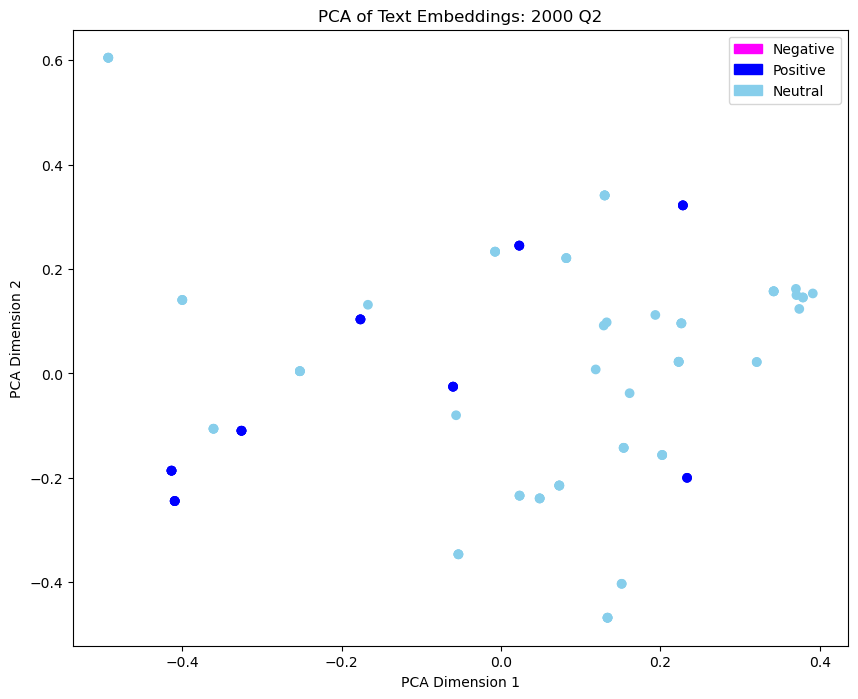

In [22]:

PCA_plot(data_q2, '2000 Q2')

### Printing Messages

In [23]:
negative_msgs_q2 = data_q2[data_q2['label'] == 'negative']
neutral_msgs_q2 = data_q2[data_q2['label'] == 'neutral']
positive_msgs_q2 = data_q2[data_q2['label'] == 'positive']

In [24]:
print_emails(negative_msgs_q2)

# 3. Assesing Quarter 3 of 2000

In [25]:
q3_2000['time'] = pd.to_datetime(q3_2000['date'], utc=True).dt.time

# Finding emails after hours
q3_2000_ah = q3_2000[(q3_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q3_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q3_2000_ah

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/3612724306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['time'] = pd.to_datetime(q3_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
104,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-10 15:02:00-07:00,22:02:00
695,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-08-10 15:02:00-07:00,22:02:00
2512,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\Sent,2000-08-10 15:02:00-07:00,22:02:00
3113,I'm not sure what is happening on my position....,john.arnold@enron.com,frank.hayden@enron.com,NaN,NaN,Re: Stress Test,\John_Arnold_Dec2000\Notes Folders\'sent mail,2000-09-26 12:26:00-07:00,19:26:00
3114,Hey freak:So we finally had LA type weather he...,john.arnold@enron.com,eleanor.fraser.2002@anderson.ucla.edu,NaN,NaN,Re: ??,\John_Arnold_Dec2000\Notes Folders\'sent mail,2000-09-26 12:23:00-07:00,19:23:00
...,...,...,...,...,...,...,...,...,...
503638,X-FileName: gwhalley.nsf----------------------...,greg.whalley@enron.com,"louise.kitchen@enron.com, andy.zipper@enron.com","X-To: Louise Kitchen, Andy Zipper",X-cc:,Epicentric Media Alert: Turning on the Power o...,X-bcc:,2000-09-25 12:02:00-07:00,19:02:00
503655,on my current trip request #382 it looks like ...,greg.whalley@enron.com,darlene@bidjetcharter.com,NaN,NaN,NaN,\Lawrence_Whalley_Dec2000\Notes Folders\Sent,2000-08-22 12:13:00-07:00,19:13:00
503656,"Mr. Nimocks,How long are you wanting Greg to s...",liz.taylor@enron.com,bnimocks@zeusdevelopment.com,NaN,NaN,RE: FW: Interactive Energy Keynote Session,\Lawrence_Whalley_Dec2000\Notes Folders\Sent,2000-08-22 12:05:00-07:00,19:05:00
516844,Content-Type: text/plain; charset=us-asciiCont...,davidpsmith@att.net,jamills@storm.ca,"\tjoanna.silver@redklay.com, syscokid@bellsout...","\tseansh@attachmate.com, darcy@dialin.net, dsh...",new email address,"\tjrosen@cadiesel.com, bmraynor@mq.psd.k12.ca....",2000-09-09 15:01:00-07:00,22:01:00


In [36]:
sus_df_q3 = q3_2000[(q3_2000['sender'].isin(suspicious_individuals[2])) | (q3_2000['recipient1'].isin(suspicious_individuals[2]))]
sus_df_q3.drop_duplicates(inplace=True)
sus_df_q3

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/1995958749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q3.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
48551,X-Origin: Cash-MX-FileName: mcash.nsfAttached ...,twanda.sweet@enron.com,jeff.skilling@enron.com,X-From: Twanda Sweet,X-To: Jeff Skilling,James Ajello,"X-cc: Mark E Haedicke, James Derrick",2000-08-22 04:40:00-07:00,11:40:00
88550,X-Origin: Delainey-DX-FileName: ddelain.nsfJef...,david.delainey@enron.com,jeff.skilling@enron.com,X-From: David W Delainey,X-To: Jeff Skilling,Cangen,"X-cc: Mark Frevert, John J Lavorato, Rick Buy",2000-08-28 05:47:00-07:00,12:47:00
199933,X-Origin: Kaminski-VX-FileName: vkamins.nsfShe...,vince.kaminski@enron.com,jeff.skilling@enron.com,X-From: Vince J Kaminski,X-To: Jeff Skilling,Re: University of Texas conference on energy f...,X-cc: Vince J Kaminski,2000-09-20 06:32:00-07:00,13:32:00
199936,X-Origin: Kaminski-VX-FileName: vkamins.nsfJef...,vince.kaminski@enron.com,jeff.skilling@enron.com,X-From: Vince J Kaminski,X-To: Jeff Skilling,University of Texas conference on energy finan...,"X-cc: Vince J Kaminski, Richard Causey",2000-09-20 04:41:00-07:00,11:41:00
200296,X-Origin: Kaminski-VX-FileName: vkamins.nsfJef...,vince.kaminski@enron.com,jeff.skilling@enron.com,X-From: Vince J Kaminski,X-To: Jeff Skilling,Wharton Partnership,"X-cc: Jeffrey A Shankman, Vince J Kaminski, Ma...",2000-08-01 08:40:00-07:00,15:40:00
...,...,...,...,...,...,...,...,...,...
444226,Just a quick note of appreciation for your hel...,evans.swann@enron.com,jeff.skilling@enron.com,NaN,NaN,"TIRR Foundation's ""I Believe I Can Fly"" Gala",\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-07-05 09:18:00-07:00,16:18:00
444234,"Hi Jeff,It was good talking to you last week! ...",bill.haack@haack.com,jeff.skilling@enron.com,NaN,NaN,YPO Area conference dates,\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-07-28 06:59:00-07:00,13:59:00
444243,"Obviously, these dates are for year 2001!> --...",bill.haack@haack.com,jeff.skilling@enron.com,NaN,NaN,FW: YPO Area conference dates,\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-07-28 07:02:00-07:00,14:02:00
444258,"Sherri,I just wanted to make sure that Elvis' ...",fredinvt@juno.com,jeff.skilling@enron.com,NaN,NaN,Re: -kai-,\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-09-14 14:35:00-07:00,21:35:00


### Sentiment Analysis

In [37]:

chunks_q3 = sf.chunk_dataframe(sus_df_q3, chunk_size=100)
data_q3 = sf.label_df(chunks_q3)
data_q3


Processing Chunk 1/2


Processing Chunk 2/2



,text,embeddings,label
0,X-Origin: Cash-MX-FileName: mcash.nsfAttached ...,"[-0.14384084939956665, 0.04920002445578575, -0...",neutral
1,X-Origin: Delainey-DX-FileName: ddelain.nsfJef...,"[-0.11485562473535538, 0.0064607649110257626, ...",neutral
2,X-Origin: Kaminski-VX-FileName: vkamins.nsfShe...,"[-0.07884388417005539, 0.022382020950317383, 0...",neutral
3,X-Origin: Kaminski-VX-FileName: vkamins.nsfJef...,"[-0.11904775351285934, 0.01166026946157217, -0...",positive
4,X-Origin: Kaminski-VX-FileName: vkamins.nsfJef...,"[-0.10136032849550247, -0.025153011083602905, ...",neutral
...,...,...,...
189,Just a quick note of appreciation for your hel...,"[-0.052232783287763596, -0.02316606044769287, ...",positive
190,"Hi Jeff,It was good talking to you last week! ...","[0.04337955266237259, -0.0358404703438282, 0.1...",positive
191,"Obviously, these dates are for year 2001!> --...","[0.018415069207549095, -0.0017350889975205064,...",positive
192,"Sherri,I just wanted to make sure that Elvis' ...","[-0.02107461728155613, 0.06784659624099731, 0....",neutral


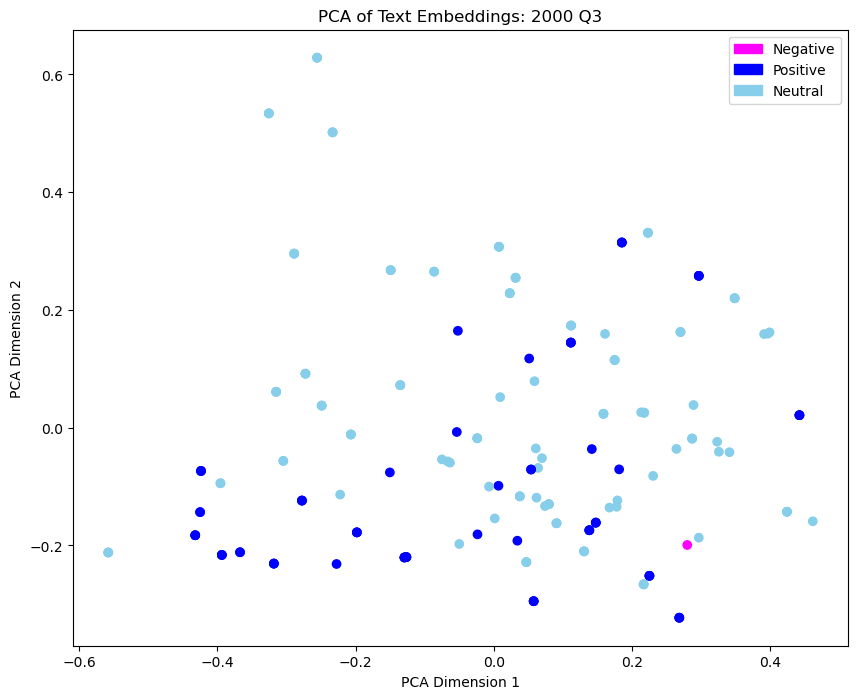

In [38]:
PCA_plot(data_q3, '2000 Q3')

### Printing Messages

In [39]:
negative_msgs_q3 = data_q3[data_q3['label'] == 'negative']
neutral_msgs_q3 = data_q3[data_q3['label'] == 'neutral']
positive_msgs_q3 = data_q3[data_q3['label'] == 'positive']

In [40]:
print_emails(negative_msgs_q3)


70: X-Origin: LAY-KX-FileName: klay.nsfKen: I have "heard" from two sources in this office that Enron will announce my successor today. I have not been advised of the selection and am concerned that this announcement will not treat my retirement in an appropriate and deserving manner.I have placed calls to Steve Kean since hearing this rumor but have not received a response as of now. Admittedl, our phone service because of the office construction is not totally functioning.Frankly, I think this matter has not been handled in a caring way and I have been acccused of giving information on the selection to Tom DeLay which is untrue. My office mates are all more aware of the candidates and their status than I have been.I regret having to contact you on this matter but feel that despite my total cooperation, allegiance and dedication to Enron, I am not being treated with the courtesy and sensitivity that this matter deserves.Joe



# 4. Assesing Quarter 4 of 2000

In [41]:
q4_2000['time'] = pd.to_datetime(q4_2000['date'], utc=True).dt.time

# Finding emails after hours
q4_2000_ah = q4_2000[(q4_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q4_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q4_2000_ah

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/2157245306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_2000['time'] = pd.to_datetime(q4_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
820,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Thursday, 14 December 2000",\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-12-13 13:28:00-08:00,21:28:00
1041,X-FileName: pallen.nsfThis request has been pe...,arsystem@mailman.enron.com,phillip.k.allen@enron.com,X-To: phillip.k.allen@enron.com,X-cc:,Your Approval is Overdue: Access Request for,X-bcc:,2000-12-13 11:02:00-08:00,19:02:00
1170,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
...,...,...,...,...,...,...,...,...,...
516058,X-bcc: X-Folder: \Andrew_Zipper_Nov2001\Notes ...,justin.boyd@enron.com,andy.zipper@enron.com,"Bcc: bruce.garner@enron.com, tom.mckeever@enro...",\tamita.gosalia@enron.com,Posting Agreement,X-From: Justin Boyd,2000-11-30 11:37:00-08:00,19:37:00
516063,Heard the Skilling meeting was postponed. Her...,travis.mccullough@enron.com,andy.zipper@enron.com,NaN,NaN,Redraft of the Exclusivity Agreement,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-11-29 11:34:00-08:00,19:34:00
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00


In [47]:
sus_df_q4 = q4_2000[(q4_2000['sender'].isin(suspicious_individuals[3])) | (q4_2000['recipient1'].isin(suspicious_individuals[3]))]
sus_df_q4.drop_duplicates(inplace=True)
sus_df_q4

/var/folders/42/5n545hgx2_g9xwrm2dmpjwjr0000gp/T/ipykernel_10000/54468408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q4.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
14,"Dave, Here are the names of the west desk mem...",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-05 06:26:00-07:00,13:26:00
583,"X-Origin: Allen-PX-FileName: pallen.nsfDave,Th...",phillip.allen@enron.com,david.delainey@enron.com,X-From: Phillip K Allen,X-To: David W Delainey,NaN,X-cc: John J Lavorato,2000-10-31 07:00:00-08:00,15:00:00
606,"Dave, Here are the names of the west desk mem...",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-10-05 06:26:00-07:00,13:26:00
1658,"Dave, Here are the names of the west desk mem...",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,2000-10-05 06:26:00-07:00,13:26:00
2976,"Dave, Here are the names of the west desk mem...",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Sent,2000-10-05 06:26:00-07:00,13:26:00
...,...,...,...,...,...,...,...,...,...
502879,Dave:The Cuiaba meeting is on Monday at 3:00 p...,james.hughes@enron.com,david.delainey@enron.com,Greg Whalley@ECT,NaN,Re: Cuiaba I Team,\Lawrence_Whalley_Dec2000\Notes Folders\Notes ...,2000-11-30 07:39:00-08:00,15:39:00
502882,greg.whalley@enron.comX-From: Raymond BowenX-T...,raymond.bowen@enron.com,david.delainey@enron.com,Content-Type: text/plain; charset=ANSI_X3.4-1968,Content-Transfer-Encoding: 7bit,Re: 2001 ENA/EGM/EIM CUSTOMER SKI PROGRAM,"Bcc: dorie.hitchcock@enron.com, mike.mcconnell...",2000-11-30 04:18:00-08:00,12:18:00
502885,greg.whalley@enron.comX-From: David W Delainey...,david.delainey@enron.com,dorie.hitchcock@enron.com,Content-Type: text/plain; charset=ANSI_X3.4-1968,Content-Transfer-Encoding: 7bit,2001 ENA/EGM/EIM CUSTOMER SKI PROGRAM,"Bcc: mike.mcconnell@enron.com, jeffrey.shankma...",2000-11-30 03:26:00-08:00,11:26:00
502896,"Lou, are there concerns that I am not aware? ...",david.delainey@enron.com,lou.pai@enron.com,NaN,NaN,MTG: How to Handle Utility Default Proposals,\Lawrence_Whalley_Dec2000\Notes Folders\Notes ...,2000-11-29 07:18:00-08:00,15:18:00


### Sentiment Analysis

In [48]:

chunks_q4 = sf.chunk_dataframe(sus_df_q4, chunk_size=100)
data_q4 = sf.label_df(chunks_q4)
data_q4


Processing Chunk 1/16


Processing Chunk 2/16


Processing Chunk 3/16


Processing Chunk 4/16


Processing Chunk 5/16


Processing Chunk 6/16


Processing Chunk 7/16


Processing Chunk 8/16


Processing Chunk 9/16


Processing Chunk 10/16


Processing Chunk 11/16


Processing Chunk 12/16


Processing Chunk 13/16


Processing Chunk 14/16


Processing Chunk 15/16


Processing Chunk 16/16



,text,embeddings,label
0,"Dave, Here are the names of the west desk mem...","[0.014703655615448952, -0.02444329671561718, -...",neutral
1,"X-Origin: Allen-PX-FileName: pallen.nsfDave,Th...","[0.01744263619184494, 0.009703442454338074, -0...",neutral
2,"Dave, Here are the names of the west desk mem...","[0.014703655615448952, -0.02444329671561718, -...",neutral
3,"Dave, Here are the names of the west desk mem...","[0.014703655615448952, -0.02444329671561718, -...",neutral
4,"Dave, Here are the names of the west desk mem...","[0.014703655615448952, -0.02444329671561718, -...",neutral
...,...,...,...
1566,Dave:The Cuiaba meeting is on Monday at 3:00 p...,"[-0.016784396022558212, 0.02580198273062706, -...",neutral
1567,greg.whalley@enron.comX-From: Raymond BowenX-T...,"[-0.09912671148777008, -0.02645258791744709, -...",neutral
1568,greg.whalley@enron.comX-From: David W Delainey...,"[-0.08030124753713608, -0.019314130768179893, ...",neutral
1569,"Lou, are there concerns that I am not aware? ...","[-0.06361662596464157, -0.003227799665182829, ...",neutral


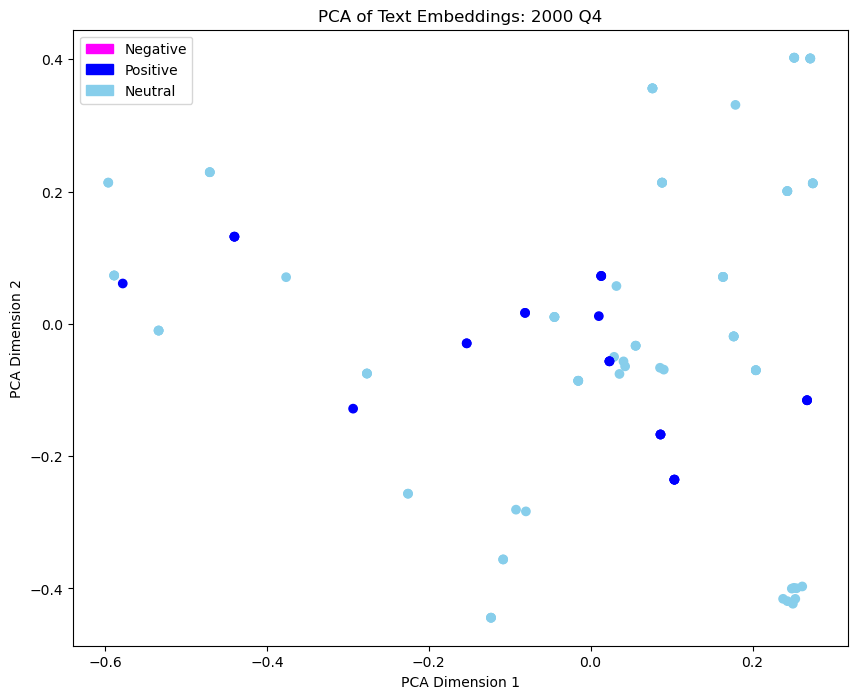

In [44]:
PCA_plot(data_q4, '2000 Q4')

### Printing Messages

In [45]:
negative_msgs_q4 = data_q4[data_q4['label'] == 'negative']
neutral_msgs_q4 = data_q4[data_q4['label'] == 'neutral']
positive_msgs_q4 = data_q4[data_q4['label'] == 'positive']

In [46]:
print_emails(negative_msgs_q4)